In [1]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

## Portas reconhecidas

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
%matplotlib notebook
from struct import unpack
import os, sys, glob, serial, usbtmc
from ipywidgets import interact, interactive, fixed, Layout, HBox, VBox, Label, FloatSlider
import ipywidgets as widgets
from IPython.display import display, SVG, HTML
from time import *
print('usbtmc:', usbtmc.list_devices())
def serial_ports():
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')
    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result
if __name__ == '__main__':
    print('serial:',serial_ports())

usbtmc: []
serial: ['COM1']


In [3]:
#Lock-in
#sr830 = serial.Serial('/dev/ttyUSB0', baudrate=19200, 
#                    parity=serial.PARITY_NONE, 
#                    stopbits=serial.STOPBITS_ONE, 
#                    bytesize=serial.EIGHTBITS, 
#                    timeout=3)

def asksr(cmd):
    sr830.write(cmd+'\n')
    sr830.flush()
    answer = sr830.readline()
    return answer

def configsr(cmd):
    sr830.write(cmd+'\n')
    
def measure():
    lockin = asksr("SNAP?1,2,3,4")
    x = float(lockin.split(',')[0])
    y = float(lockin.split(',')[1])
    amp = float(lockin.split(',')[2])
    phas = float(lockin.split(',')[3])
    return x, y, amp, phas

def mkDir(name):
    dir_name = os.path.join(os.path.expanduser('~'), 'Desktop', name)
    if os.path.exists(dir_name):
        os.chdir(dir_name)
    else:
        os.mkdir(dir_name)
        os.chdir(dir_name)
        
HTML('''
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>''')#default

<IPython.core.display.Javascript object>


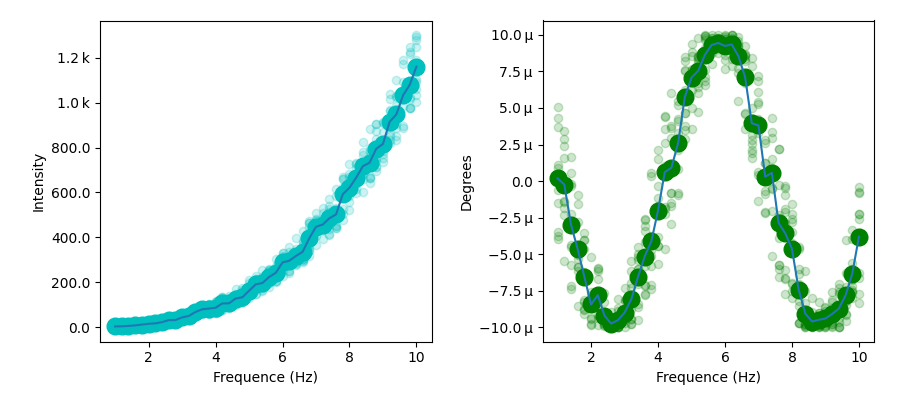

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'papertype'

In [4]:
Date = widgets.DatePicker(description='Pick a Date', disabled=False)

Med = widgets.BoundedIntText(
    description=u"Média:", 
    min=0, 
    max=99999, 
    value=10)

FirstHz = widgets.FloatText(
    description="First (Hz):", 
    min=0, 
    max=99999, 
    value=1)

LastHz = widgets.FloatText(
    description="Last (Hz):", 
    min=0, 
    max=99999, 
    value=10)

StepHz = widgets.FloatText(
    description="Step (Hz):", 
    min=0, 
    max=99999, 
    value=0.2)

Comment=widgets.Text(
    value='VML',
    placeholder='Type something',
    description='Comment:',
    disabled=False)

f = Progress=widgets.FloatProgress(
value=0,
min=0,
max=float(LastHz.value),
step=float(StepHz.value),
description='Progress:',
bar_style='info',
orientation='horizontal')

button2 = widgets.Button(description="Run",  layout=Layout(width='70%', height='50px'))
button2.style.button_color = '#a5ff46'

def main(b):
    Int, Freq, Phas, Int_t, Phas_t, Freq_t, stdInt, stdPhas = [],  [],  [],  [],  [],  [], [], []
    f.max=float(LastHz.value)
    f.step=float(StepHz.value)
    f.value = float(FirstHz.value)
    mkDir(str(Date.value))
    now = strftime("%a %d %b %Y %H_%M_%S")
    ark = open(os.path.join(os.path.expanduser('~'), 'Desktop', str(Date.value))+'/'+
               str(Comment.value)+'_'+now+".txt", "w")
    ark.write('Frequence'+"\t"+'Intensity'+"\t"+'errInt'+"\t"+'Phase'+"\t"+'errPhas'+"\n")
    for i in np.arange(float(FirstHz.value), float(LastHz.value)+float(StepHz.value), float(StepHz.value)):
        #configsr("FREQ "+str(i))
        sleep(0.1)        
        #getfreq = float(asksr('FREQ?'))     
        for h in range(int(Med.value)):
            #medida = measure()
            Int_t.append((i+np.random.random())**3)#float(medida[2]))
            Phas_t.append((1E-5)*np.cos(i+np.random.random()))#float(medida[3]))
            Freq_t.append(i)#getfreq)
            line1.set_data(Freq_t,Int_t)
            line3.set_data(Freq_t,Phas_t)
            sleep(0.1)
            replot()
        Int.append(np.mean(Int_t[-int(Med.value):]))#float(medida[2]))
        stdInt.append(np.std(Int_t[-int(Med.value):]))
        Phas.append(np.mean(Phas_t[-int(Med.value):]))#float(medida[3]))
        stdPhas.append(np.std(Phas_t[-int(Med.value):]))
        Freq.append(i)#getfreq)
        line0.set_data(Freq,Int)
        line2.set_data(Freq,Phas)
        ark.write(str(Freq[-1])+"\t"+str(Int[-1])+"\t"+str(stdInt[-1])+"\t"+str(Phas[-1])+"\t"+str(stdPhas[-1])+"\n")
        replot()
        f.value += float(StepHz.value)
    ark.close()
    ax[0].plot(Freq, Int)
    ax[1].plot(Freq, Phas)
    plt.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', str(Date.value))+'/'+
               str(Comment.value)+'_'+now+".png", dpi=120, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None, transparent=False,
                bbox_inches=None, pad_inches=0.1, frameon=None)
    Int, Freq, Phas, Int_t, Phas_t, Freq_t, stdInt, stdPhas = [],  [],  [],  [],  [],  [], [], []

button2.on_click(main)
    
def replot():
    for i in range(len(ax)):
        ax[i].relim()
        ax[i].autoscale_view(True,True,True)
        fig.canvas.draw()

config1 = VBox([Date,Med,Comment])
config2 = VBox([FirstHz, LastHz, StepHz])
config3 = VBox([button2,f], layout=Layout(align_items='flex-end'))
config4 = HBox([config1, config2, config3])
display(config4)

%matplotlib notebook
fig,ax = plt.subplots(1,2,figsize=(9,4))
formatter = EngFormatter(places=1, sep=u"\N{THIN SPACE}")
for i in range(len(ax)):
    ax[i].set_xlabel('Frequence (Hz)')
    ax[i].yaxis.set_major_formatter(formatter)
ax[0].set_ylabel('Intensity')
ax[1].set_ylabel('Degrees')
fig.tight_layout()
line0, = ax[0].plot([],[], 'co', markersize=12)
line1, = ax[0].plot([],[], 'co', alpha=0.2)
line2, = ax[1].plot([],[], 'go', markersize=12)
line3, = ax[1].plot([],[], 'go', alpha=0.2)